# Final Project Vertically Driven Damped Planar Pendulum

Name: Manav Bilakhia

Date: 7th November 2022

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics
import random
from time import sleep
import scipy
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
from math import remainder, tau

# The Numerical Method

Here I have first defined my main computational tool that I will be using throughout, Runge-Kutta 4 (RK4)

In [2]:
def Rk4(F, x0, delta_t, N):
    t_n = np.array([0.0 for i in range(N+1)])#declaring the initial t array
    x_n = np.array([x0 for i in range(N+1)]) #declaring the initial x array
    for i in range(1, N+1):  # looping for a given number of steps 
        t = t_n[i-1]+ delta_t # calculating the next t value 
        k1 = (F(x_n[i-1],t_n[i-1]))*delta_t #calculating preliminary value for later weighted average
        k2 = (F(x_n[i-1]+k1/2,t_n[i-1]+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        k3 = (F(x_n[i-1]+k2/2,t_n[i-1]+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        k4 = (F(x_n[i-1]+k3,t_n[i-1]+delta_t))*delta_t #calculating preliminary value for later weighted average
        t_n[i] = np.array([ t]) #storing t values in an array
        x = x_n[i-1]+(1/6)*(k1+2*k2+2*k3+k4) #next term of x using weighted average
        x_n[i] = np.array([np.array([x])])
    return x_n, t_n #returning the arrays

In [3]:
def f3(x_n,t): #mathematical function for the vertically driven damped pendulum
    return np.array([x_n[1],-(alpha-(beta * np.cos(t))) * np.sin(x_n[0]) - gamma*x_n[1]])
alpha = 1 #frequency     
beta = 0  #driving force
gamma = 0 #damping force
x_n4, t_n4 = Rk4(f3, [0,math.pi/2], 0.1, 10) #using RK4 method

I will use the RK4 to understand and the vertically damped driven planar pendulum and solve its second order differential equation of motion (refer to the proposal for the derivation of the equation)
 
$$
\ddot{\theta} = -[\alpha - \beta \cos(\tau)]\sin(\theta) - \gamma \dot{\theta}
$$

where,

$$
\alpha = \frac{g}{L \omega^2} = \left(\frac{\text{natural frequency}}{\text{driving frequency}}\right)^2, \hspace{.75in} \beta = \frac{A}{L} = \left(\frac{\text{Amplitude of driving}}{\text{length of pendulum}}\right), \hspace{.75in} \gamma = \frac{\tilde{\gamma}}{\omega} = \left(\frac{\text{damping parameter}}{\text{driving frequency}}\right)
$$



# Checks

First and foremost, let us test our RK4 function on this system by setting the driving strength $\beta$, damping term $\gamma$ to 0 and set $\alpha$ to 1 such that the system resonates thereby essentially making it a simple pendulum. As we graph this, we should expect the position vs time graph to look similar to sine function with its amplitude at $\frac{\pi}{2}$ with a time period of $2\pi$  We should also expect the Velocity vs time graph to be similar to a cosine curve with the same amplitude time period. We can also use our trapezoid approximation code to calculate approximately what the period of this pendulum should be. 

In [4]:
def box_approx(F, x0, xf, N): 
    j = 0  #declaring loop variable
    sumation = 0 #declaring sumation
    delf = ((xf - x0)/N) #calculating delta_x 
    while (j < N):
        sumation = sumation + (F(x0+(j*delf))*delf) #sumation of area of each division
        j+=1 #loop variable incrementation
    return sumation
def trap_approx(F, x0, xf, N):
    smation = 0 #declaring sumation
    delf = ((xf - x0)/N) #calculating delta_x 
    sumation =  box_approx(F, x0, xf, N) + (F(xf)-F(x0))*0.5*delf  #sumation of area of each division
    return sumation
def period(theta0): # function that calculates the period 
    def func(phi):# mathematical function to be integrated
        return 1/(1-(((math.sin(theta0/2))**2)*((math.sin(phi))**2)))**(1/2)
    return (2/math.pi* trap_approx(func, 0, math.pi/2, 1000))
print(period(1.806))

1.2527585191354513


1.2527585191354513 is approximately the period of our pendulum which is shifted by $2*\pi$.  I will be marking the period of our pendulum with a red line on the graphs below

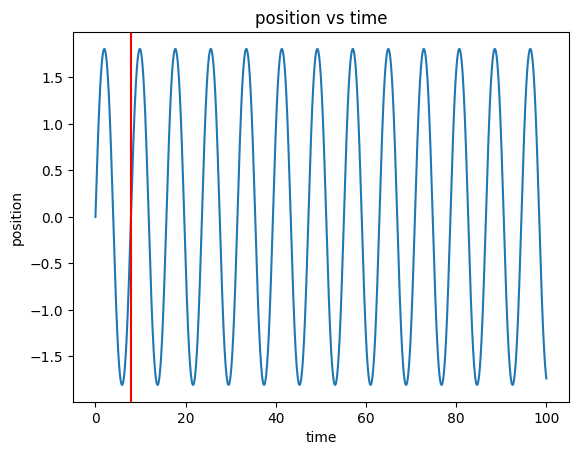

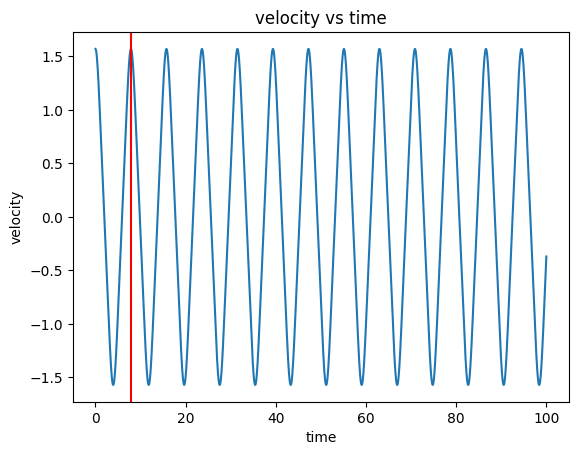

In [5]:
def f3(x_n,t): #mathematical function for the vertically driven damped pendulum
    return np.array([x_n[1],-(alpha-(beta * np.cos(t))) * np.sin(x_n[0]) - gamma*x_n[1]])
alpha = 1 #frequency     
beta = 0  #driving force
gamma = 0 #damping force
x_n4, t_n4 = Rk4(f3, [0,math.pi/2],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
v_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.axvline(x = 1.2527585191354513*math.pi*2, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.show()

plt.plot(t_n4, v_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("time") #xlabel
plt.ylabel("velocity") #ylabel
plt.title("velocity vs time") #title
plt.axvline(x = 1.2527585191354513*math.pi*2, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.show()

The graphs behave exactly as we predicted in the situation where there is no damping and driving force. Hence we know that our function for the vertically driven damped planar pendulum works. The red line shows our estimation for the time  period which seems a colse approximation bsed on the initial conditions we have defined. Here we also see that our amplitude is approximately 1.8 which is more than $\frac{\pi}{2}$. This measns that the the swing of this pendulum is quite substantial and it goes way above the horizontal. 
Let us now add a some damping force and we should be able to see a sine curve with a gradually decreasing amplitude

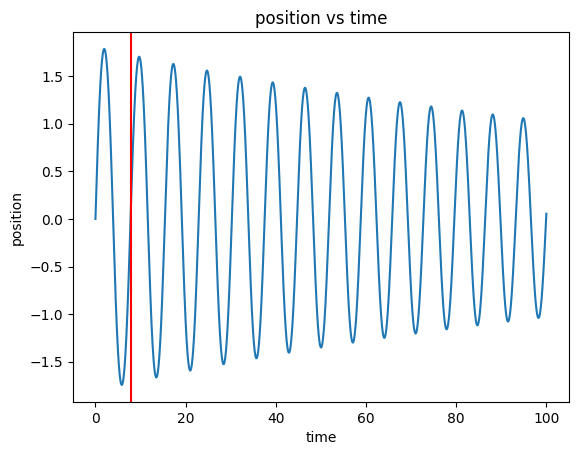

In [6]:
alpha = 1    #frequency                     
beta = 0     #driving force                                   
gamma = 0.01 #damping force                                 
x_n4, t_n4 = Rk4(f3, [0,math.pi/2],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.axvline(x = 1.2527585191354513*math.pi*2, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.show()

We were able to predict the behavior again which means that the damping part of our equation works. Here we also see that the period is actually slightly decreasing as the size of the oscillation decreases. This is because because of the relationship between period and amplitude for a pendulum is of direct proportionality. The next thing we will check is the driving force and how it counters the damping. The values $\alpha = 0.5, \beta = 0.1, \gamma = 0.03$ correspond to the stability of the downward state for the system. We will not plot the position vs time graph for these parameters. 

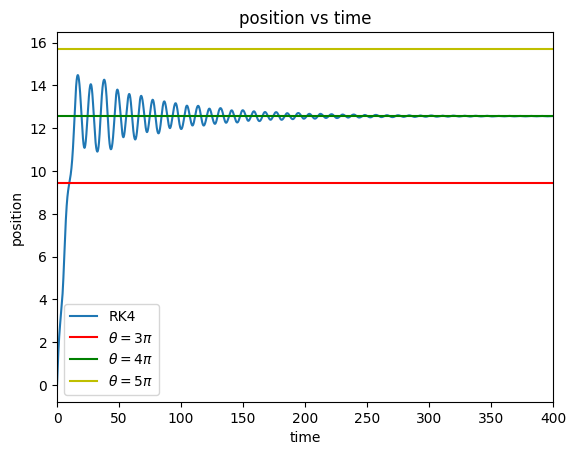

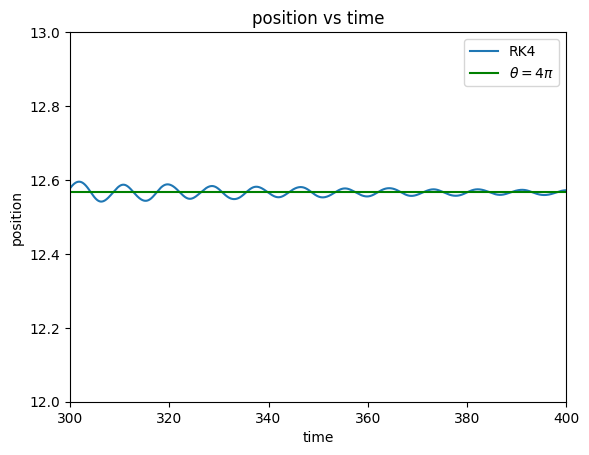

In [7]:
alpha = 0.5  #frequency                                  
beta = 0.1   #driving force                          
gamma = 0.03 #damping force                    

x_n4, t_n4 = Rk4(f3, [0,math.pi/2],  0.001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = 3*math.pi, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #multiple of pi
plt.axhline(y = 4*math.pi, color = 'g', linestyle = '-',label = "$\\theta = 4\\pi$") #multiple of pi
plt.axhline(y = 5*math.pi, color = 'y', linestyle = '-',label = "$\\theta = 5\\pi$") #multiple of pi
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.xlim(0, 400) #xrange
plt.legend()
plt.show()

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
#plt.axhline(y = 3*math.pi, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #multiple of pi
plt.axhline(y = 4*math.pi, color = 'g', linestyle = '-',label = "$\\theta = 4\\pi$") #multiple of pi
#plt.axhline(y = 5*math.pi, color = 'y', linestyle = '-',label = "$\\theta = 5\\pi$") #multiple of pi
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.xlim(300, 400) #xrange
plt.ylim(12,13)
plt.legend()
plt.show()

In the plot above, I have changes the initial conditions such that there is a very big transient after which the plot seems to settle into its normal sinusoidal form with the amplitude almost being the same for all the other peaks outside of the transient. It is also worth noting that the pendulum dies down at around $4\pi$ as the pendulum swung around two complete circles before settling down. 


I shall now set the values of $\alpha = 0.1, \beta = 0.545, \gamma = 0.08$. These values correspond to a stable configuration for the upside-down pendulum.

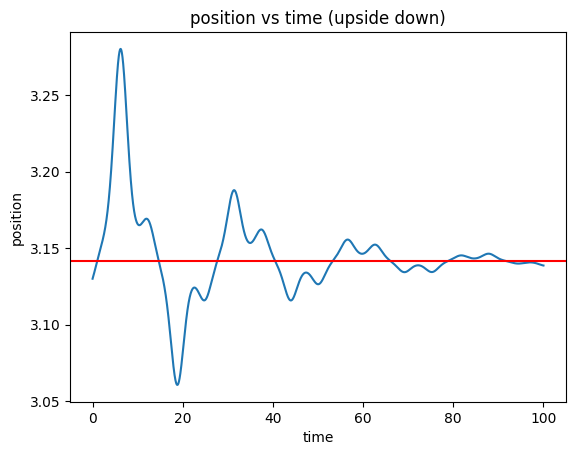

In [8]:
alpha = 0.1  #frequency                             
beta = 0.545  #driving force                               
gamma = 0.08  #damping force                                  

x_n4, t_n4 = Rk4(f3, [3.13,0.01], 0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = math.pi, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$")
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time (upside down)") #title
plt.show()

Here we see that the transient behavior dies out pretty soon and we see that the oscillation does settle down after a bit. The initial condition is set very close to $\pi$ in order to explore the upside down stability
I shall now set the values of $\alpha = 0.02, \beta = 0.35, \gamma = 0.03$.  we have stability for both
the upward and downward position of the pendulum. For the downward position, I will set my initial condition to 0 and for the upward one, I will set it to $\pi$

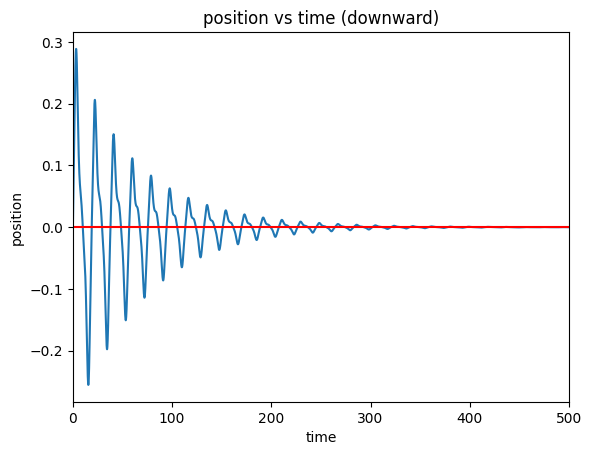

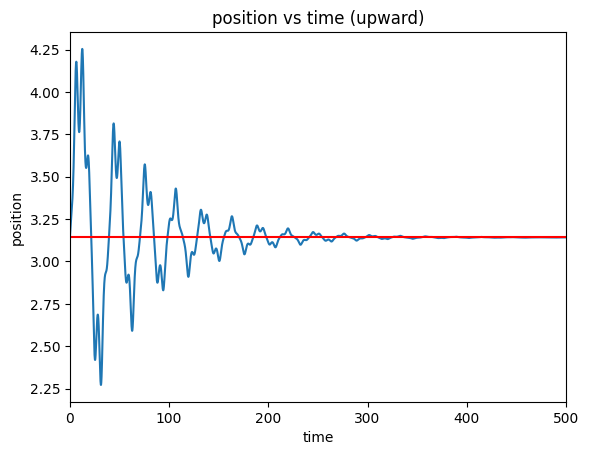

In [9]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force                         

x_n4, t_n4 = Rk4(f3, [0,0.1],  0.001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time (downward)") #title
plt.xlim(0, 500) #xrange
plt.show()

alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force                         

x_n4, t_n4 = Rk4(f3, [math.pi,0.1],  0.001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = math.pi, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = pi
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time (upward)") #title
plt.xlim(0, 500)  #xrange
plt.show()

We have shown here that those initial conditions do make the pendulum stable after a small transient for both upward and downward.
So far, the pendulum has behaved in the exact predicted manner which suggests that our RK4 method and our equation of motion hold true. 

# Phase Diagrams (stability and attractors)

So far we know that this system has two equilibrium configurations: the downward position and the upward position. Let us now examine the behavior of the pendulum at $\alpha = 0.02, \beta = 0.35, \gamma = 0.03$. We specifically chose these initial parameters because at these parameters we have stability for both the upward and the downward position and five co-existing attractors.

A stable equilibrium state of a pendulum corresponds to the situation in which the mass is stationary and when the mass is moving near that particular equilibrium, it must settle in at that equilibrium position. 

An Attractor is a special stable fixed point because a small displacement from it will stay near the fixed point always in fact, it will eventually fall into the fixed point. 

Here I will first graph all the attractors at the initial conditions $\alpha = 0.02, \beta = 0.35, \gamma = 0.03$

1 down
2 down
3 down
4 down
5 down
6 down


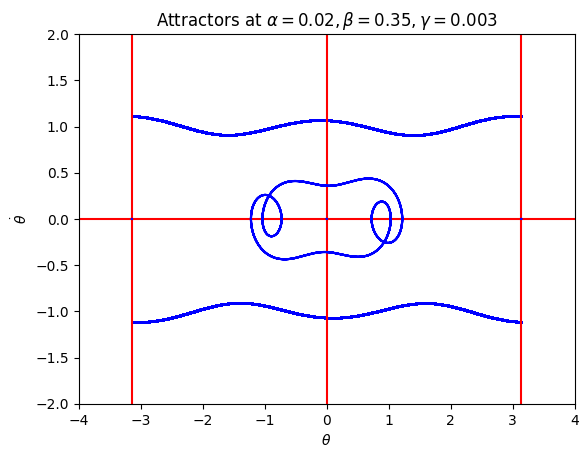

In [10]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force                         

#point at (pi, 0)
x_n4, t_n4 = Rk4(f3, [0,0.5],  0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.axvline(x = math.pi, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.plot(x_vals4, y_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
print("1 down")

#point at (0, 0)
x_n4, t_n4 = Rk4(f3, [0,0.4],  0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
plt.axvline(x = 0, color = 'r', label = 't = $4x_{0}$') # x = 0
plt.plot(x_vals4, y_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
print("2 down")

#point at (-pi, 0)
x_n4, t_n4 = Rk4(f3, [-math.pi,0.1], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
plt.axvline(x = -math.pi, color = 'r', label = 't = $4x_{0}$') #x = -pi
plt.plot(x_vals4, y_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
print("3 down")

#center diagram
x_n4, t_n4 = Rk4(f3, [0,0.370], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
plt.plot(x_vals4, y_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
print("4 down")

#top line
x_n4, t_n4 = Rk4(f3, [0,1.5/1.35], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
x_vals4 = np.fmod(x_vals4,2*math.pi) - np.pi #getting it in the range [-pi,pi]
plt.scatter(x_vals4, y_vals4, label = "RK4",s=1,color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
print("5 down")

#bottom line
x_n4, t_n4 = Rk4(f3, [0,-1.5/1.35], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
x_vals4 = np.fmod(x_vals4,2*math.pi) + np.pi #getting it in the range [-pi,pi]
plt.scatter(x_vals4, y_vals4, label = "RK4",s=1,color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
print("6 down")

plt.ylim(-2,2) #yrange
plt.xlim(-4,4)  #xrange
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractors at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title




plt.show()

In any given pendulum system, the downward attractor is always the easiest to analyze as it is just the downward equilibrium where the mass just stays still. 

I will first graph the position vs time, velocity vs time and then the phasemap for the same. 

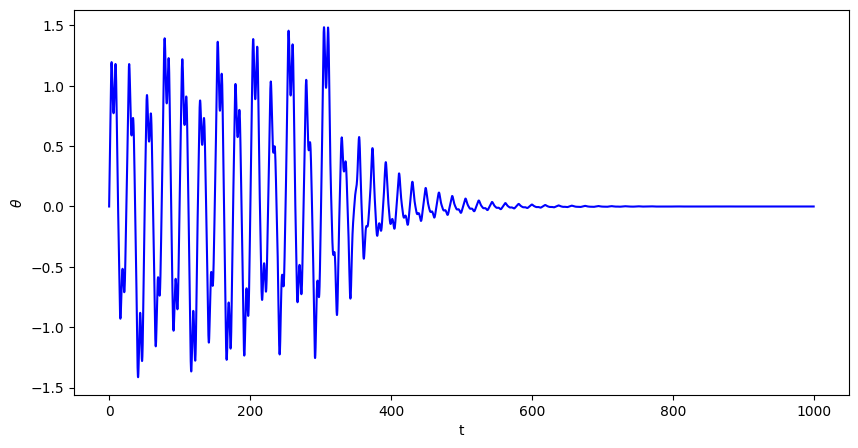

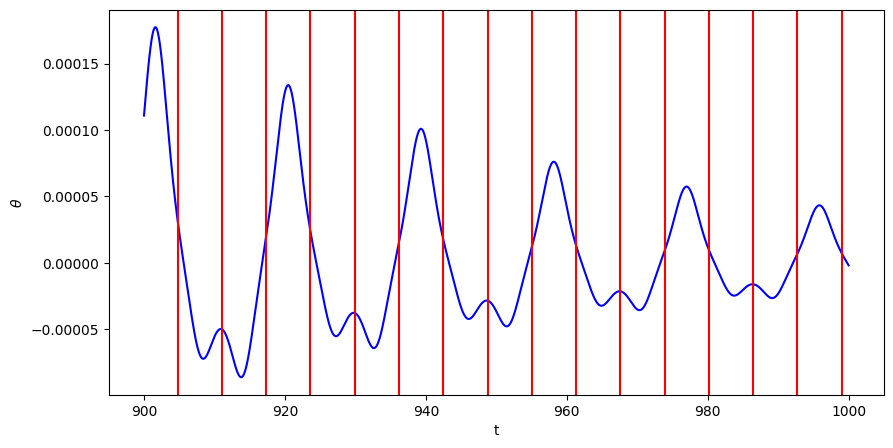

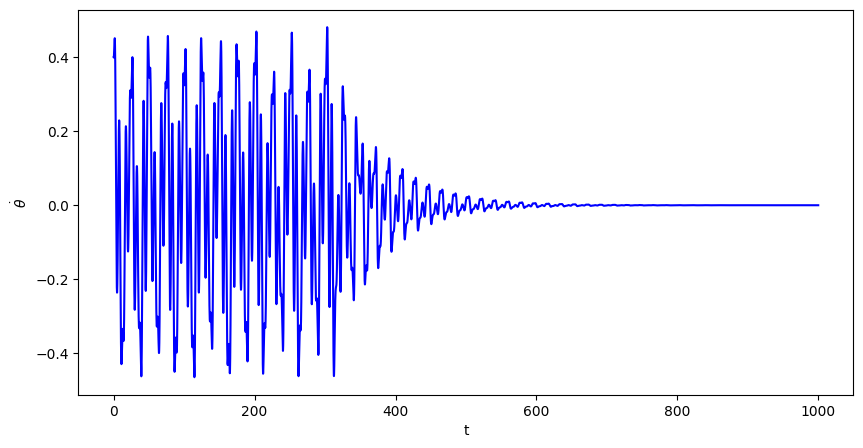

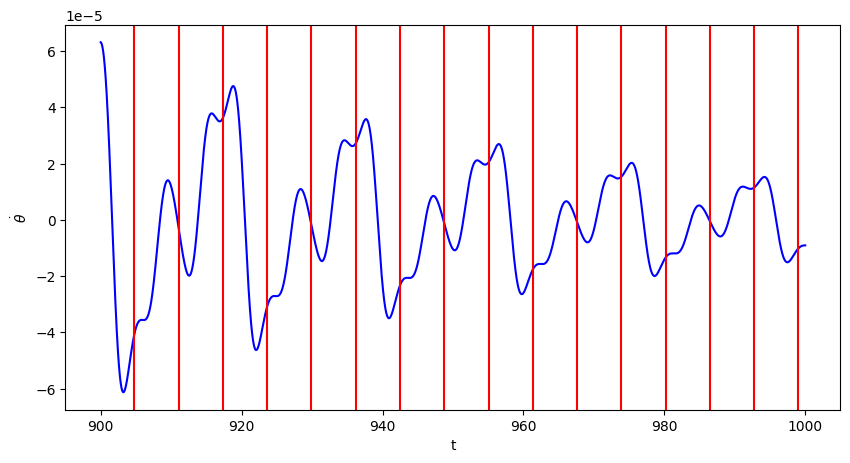

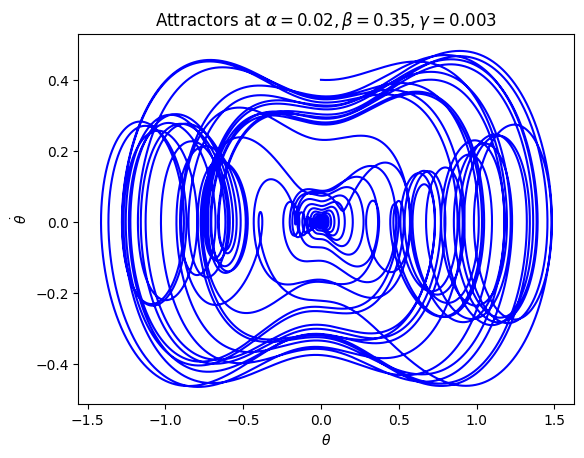

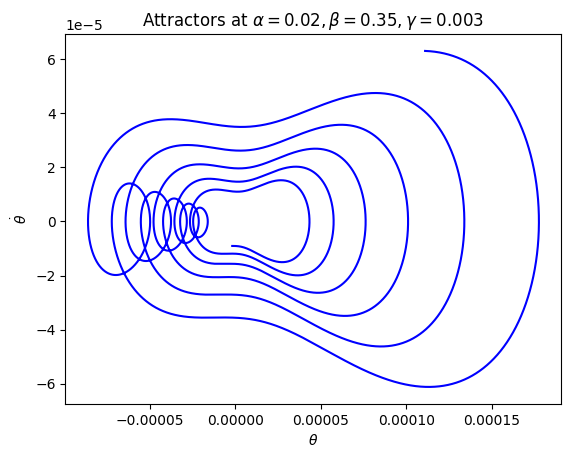

In [11]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force 


x_n4, t_n4 = Rk4(f3, [0,0.4],  0.001, 1000000) #using RK4 method
x_vals4_full = np.array([x_n4[i][0]for i in range (len (x_n4))]) # getting position vals from the meshed list
y_vals4_full = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
t_vals4  = [t_n4[i] for i in range (900001,len (t_n4))] #getting time vals from the meshed list

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, x_vals4_full, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
plt.ylabel("$\\theta$") #y axis
plt.xlabel("t") # xaxis
#plt.xlim(0,500)  #xrange
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_vals4, x_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
for i in range(144, 160):
    plt.axvline(x = i*(2*math.pi), color = 'r', linestyle = '-') #y = 2*pi
plt.ylabel("$\\theta$") #x axis
plt.xlabel("t") # yaxis
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, y_vals4_full, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("t") # yaxis
#plt.xlim(0,500)  #xrange
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_vals4, y_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
for i in range(144, 160):
    plt.axvline(x = i*(2*math.pi), color = 'r', linestyle = '-') #y = 2*pi
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("t") # yaxis
plt.show()

plt.plot(x_vals4_full, y_vals4_full, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractors at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title
plt.show()

plt.plot(x_vals4, y_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractors at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title
plt.show()


Here we know that at the downward attractor should go to rest at 0 which we see i settle at in the very first plot in this section. On maximizing the plot we see that it still oscillates with a dying amplitude as it approaches tom zero. For it to be completely zero we must run the code for an infinite amount to time. We can say the same thing for the velocity vs time plot that it also dies down and tries to settle towards 0. The difference between the 2 red lines on these graphs is $2*\pi$. Here we see that the graph repeats its behavior after every 4 red lines which means it take exactly 4 cycles for the pendulum to come back to its initial position and start all over again. 

Lastly we draw the phasemap for this initial condition. While phasemaps are a very good tool to visualize what is actually going on we do lose information about time. Here we expect that after the transient which is visible in the 5th graph, it should settle at the point (0,0) We can see this when we plot the phase map without the transient. 

We shall repeat the same process for the other type of attractors that do not settle at one point but instead settle into a constant pattern of motion

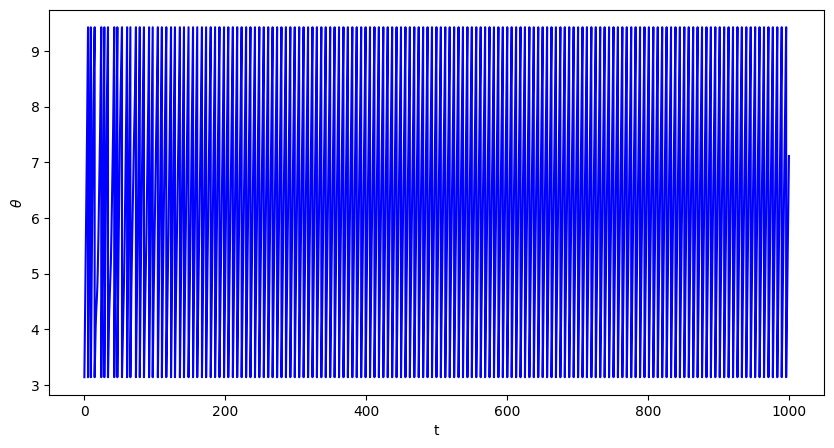

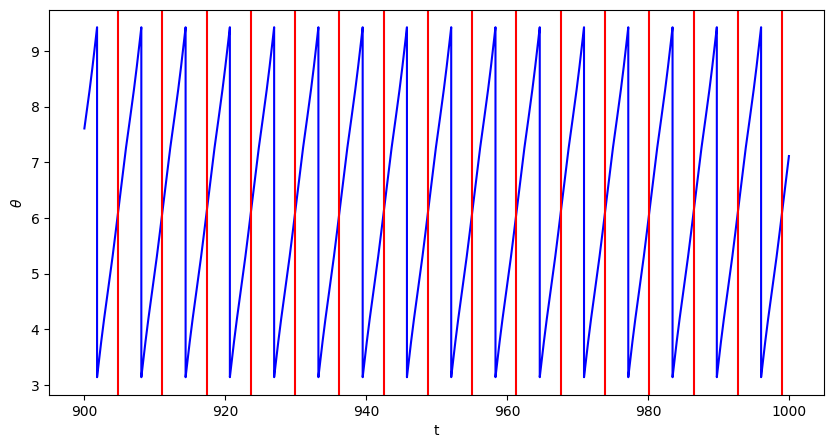

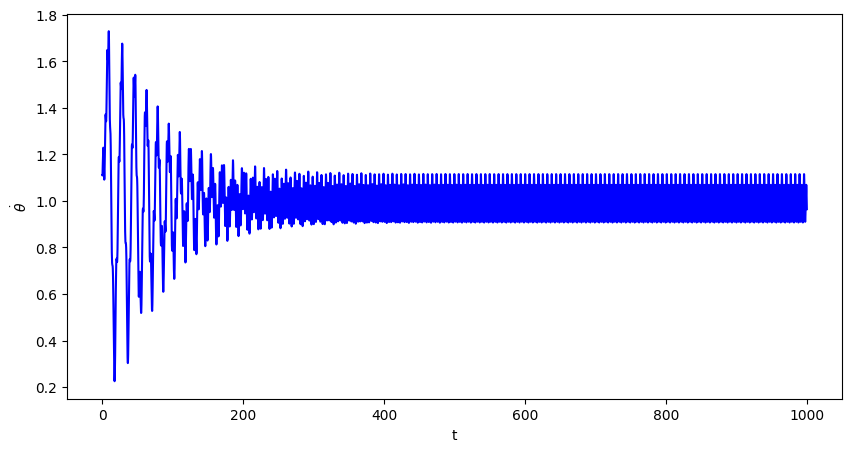

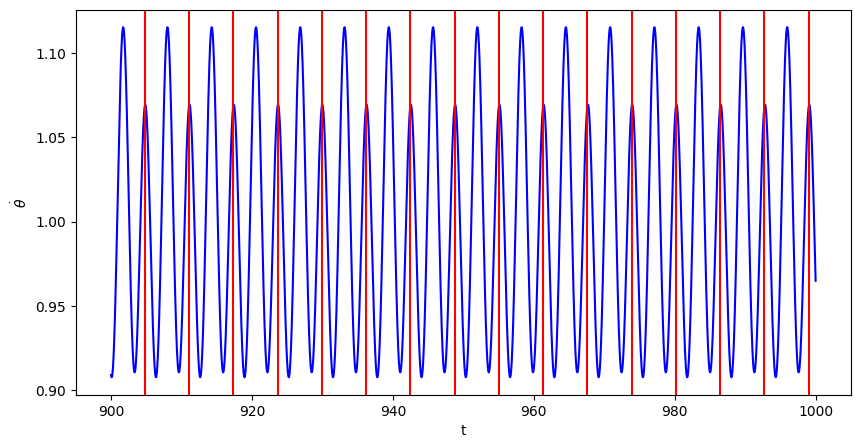

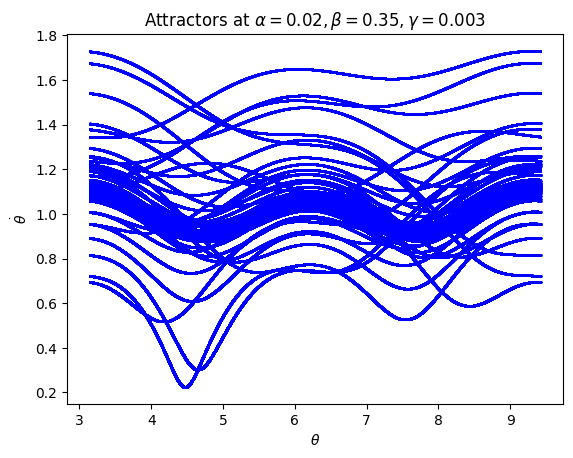

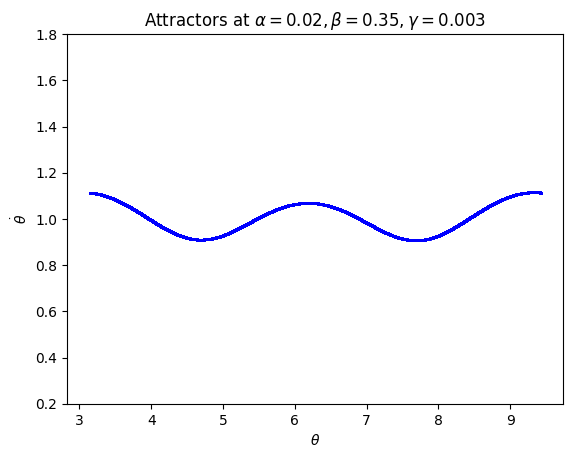

In [12]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force 


x_n4, t_n4 = Rk4(f3, [0,1.5/1.35], 0.001, 1000000) #using RK4 method
x_vals4_full = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
x_vals4_full = np.fmod(x_vals4_full,2*math.pi) + np.pi #getting it in the range [-pi,pi]
y_vals4_full = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
x_vals4 = np.fmod(x_vals4,2*math.pi) + np.pi #getting it in the range [-pi,pi]
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
t_vals4  = [t_n4[i] for i in range (900001,len (t_n4))] # getting time vals from the meshed list

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, x_vals4_full, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
plt.ylabel("$\\theta$") #y axis
plt.xlabel("t") # xaxis
#plt.xlim(0,500)  #xrange
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_vals4, x_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
for i in range(144, 160):
    plt.axvline(x = i*(2*math.pi), color = 'r', linestyle = '-') #y = 2pi
plt.ylabel("$\\theta$") #x axis
plt.xlabel("t") # xaxis
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, y_vals4_full, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("t") # xaxis
#plt.xlim(0,500)  #xrange
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_vals4, y_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
for i in range(144, 160):
    plt.axvline(x = i*(2*math.pi), color = 'r', linestyle = '-') #y = 2pi
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("t") # xaxis
plt.show()

plt.scatter(x_vals4_full, y_vals4_full, label = "RK4",s=1,color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
#plt.ylim(-2,2) #yrange
#plt.xlim(-4,4)  #xrange
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractors at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title
plt.show()

plt.scatter(x_vals4, y_vals4, label = "RK4",s=1,color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractors at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title
plt.ylim(0.2, 1.8)
plt.show()


Here we have followed the same procedure as above where we graph the position vs time, velocity vs time and then the phasemap with the red lines again denote the same as above. The only difference here is that our pendulum does not settle down to a point but settles into a pattern as seen in the first and the third graph. It is interesting to see what happens when we make sure that all our values are between $-\pi$ and $\pi$. It becomes easier to see how graph 3 is the derivative of graph 1. Another thing here worth observing is that while our initial conditions in for this case are  [0,1.5/1.35], the same can be said for  [0,-1.5/1.35] as it also produces the similar results, but for the upside down configuration. 

We shall repeat the same process for the other type of attractors that do not settle at one point but instead settle into a constant pattern of motion. The constant pattern of motion here is around the point (0,0) on the phasemap but not at (0,0)

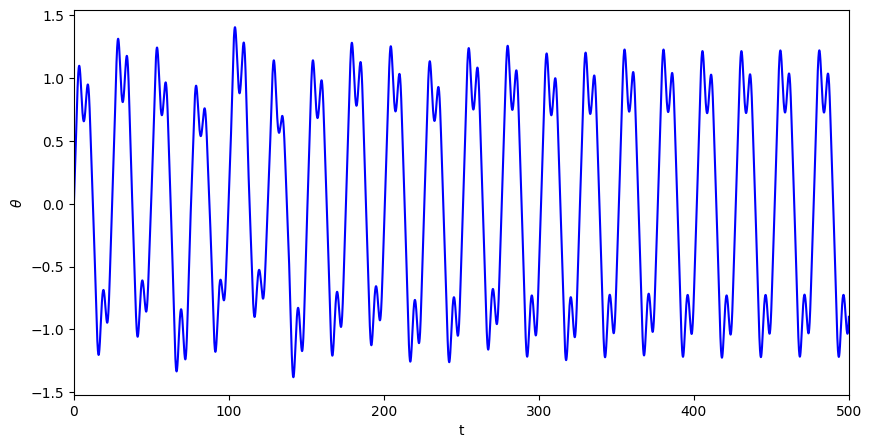

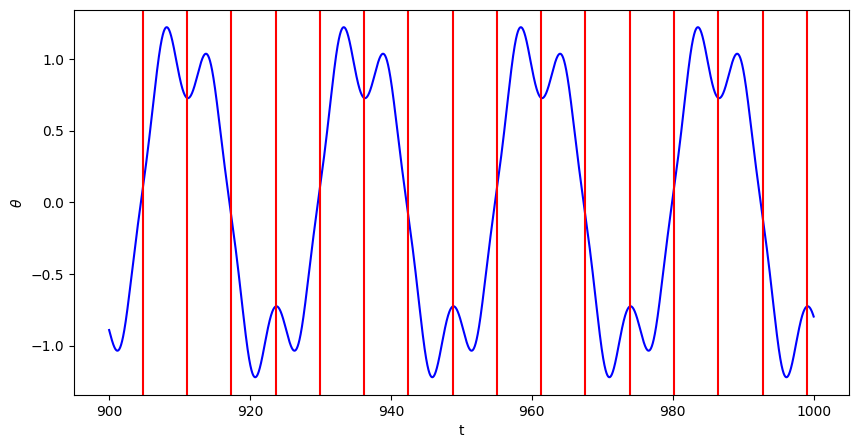

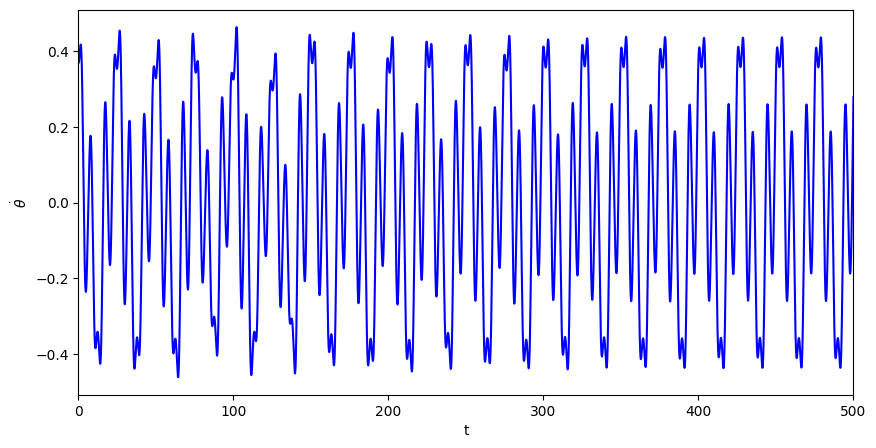

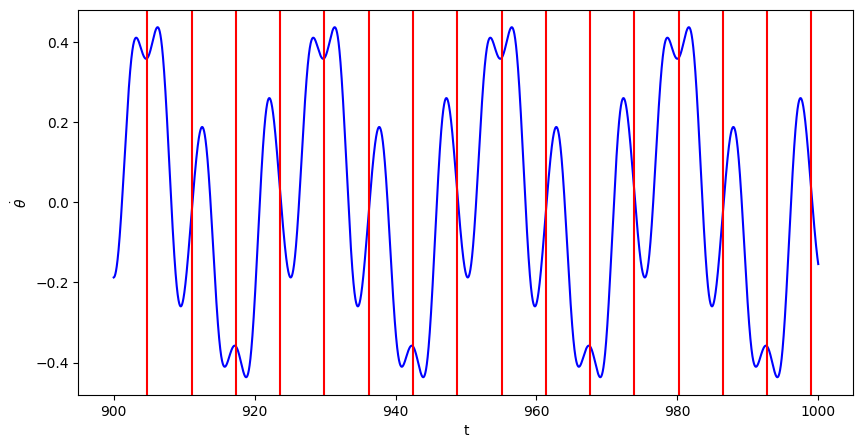

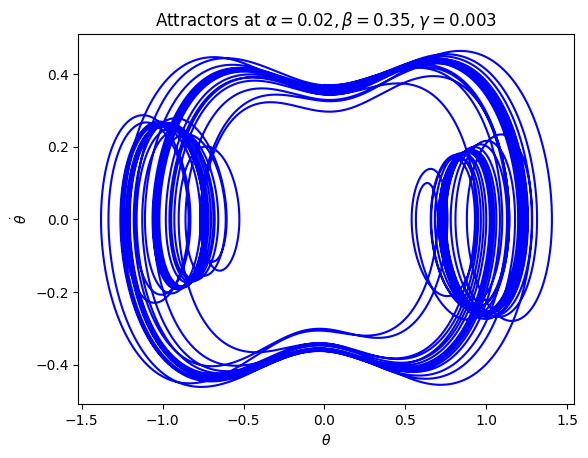

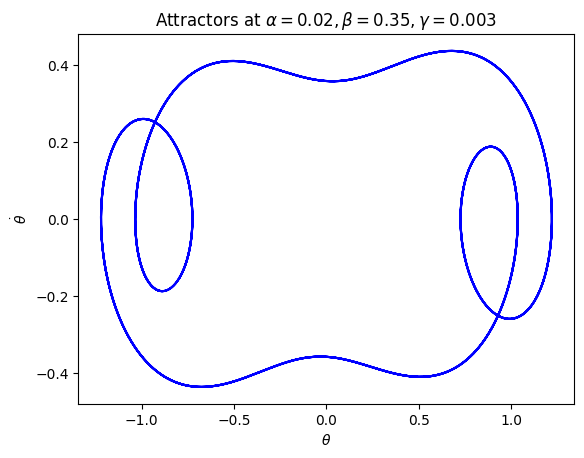

In [13]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force 


x_n4, t_n4 = Rk4(f3, [0,0.370], 0.001, 1000000) #using RK4 method
x_vals4_full = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4_full = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
t_vals4  = [t_n4[i] for i in range (900001,len (t_n4))]# getting time vals from the meshed list

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, x_vals4_full, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
plt.ylabel("$\\theta$") #y axis
plt.xlabel("t") # xaxis
plt.xlim(0,500)  #xrange
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_vals4, x_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
for i in range(144, 160):
    plt.axvline(x = i*(2*math.pi), color = 'r', linestyle = '-') #y = 2*pi
plt.ylabel("$\\theta$") #x axis
plt.xlabel("t") # xaxis
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, y_vals4_full, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("t") # xaxis
plt.xlim(0,500)  #xrange
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_vals4, y_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
for i in range(144, 160):
    plt.axvline(x = i*(2*math.pi), color = 'r', linestyle = '-') #y = 2*pi
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("t") # xaxis
plt.show()

plt.plot(x_vals4_full, y_vals4_full, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractors at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title
plt.show()

plt.plot(x_vals4, y_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractors at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title
plt.show()





Here we again have the same exact interpretation for these graphs where we see the pendulum settling into a particular pattern.

# Things I was supposed to submit this week (24/10/2022):

Have a better understanding of phase diagrams and the physics behind those

Read through the lecture notes provided to understand attractors, basin of attraction and phase diagrams. 

Finish the incomplete section on phasemaps along with the physics behind it. 

Implement basic RK4 for this equation and check if with $\alpha = 1, \beta = 0, \gamma = 0$ it resembles a actual never dying pendulum. 

Implement basic RK4 for this equation and check if with $\alpha = 1, \beta = 0, \gamma > 0$ it resembles a actual dying pendulum.

Look further into attractors and basin of attractions to understand these jargons more and from other readings, find out values for  $\alpha, \beta, \gamma $ where they show interesting behavior. 

I have performed checks to understand the behavior and make sure that the code that I have written is correct. I was not able to get a better insight into attractors and basin of attractions. Hence I have started working on phase diagrams. While I do not completely understand the physics behind it, the code is partially ready.

While I have coded the phase diagrams at a different interesting initial conditions. I still do not understand the physics behind it.

# Things I was supposed to submit this week (31/10/2022):

Have a better understanding of phase diagrams and the physics behind those

Read through the lecture notes provided to understand attractors, basin of attraction and phase diagrams. 

Finish the incomplete section on phasemaps along with the physics behind it. 

I have completed the incomplete section on phasemaps and have some understanding about the terms attractors and phasemaps. I still have to work on understanding basin of attractions and plot them.

# Things I was supposed to submit this week (7/11/2022):

I will try to understand what a basin of attraction is. 

I will write an algorithm to see what initial conditions lead to which particular attractor. 

Instead of doing these things, I have focused more on the physics behind the terms stability,  instability and attractors. Hence there isnt much new code or graphs but I will be mainly working on the physical explanations and try to explain the existing graphs more

# Aims for next week

I will try to understand what a basin of attraction is and get to the concept of strange attractors and poincare section for these parameters. 

# Future work:

The same study can be done at other parameters. The 2 other sets of interesting sets of parameters that I have found are :
1)alpha = 0.5                               
beta = 0.1                            
gamma = 0.03

2)alpha = 0.1                             
beta = 0.545                          
gamma = 0.08 

# Examining the downward state of the pendulum (Future work starts here)

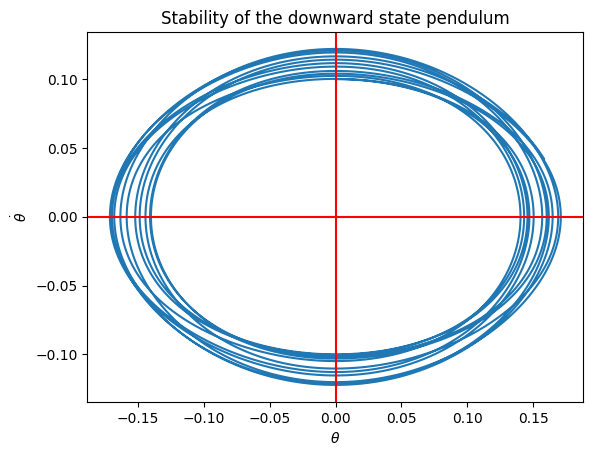

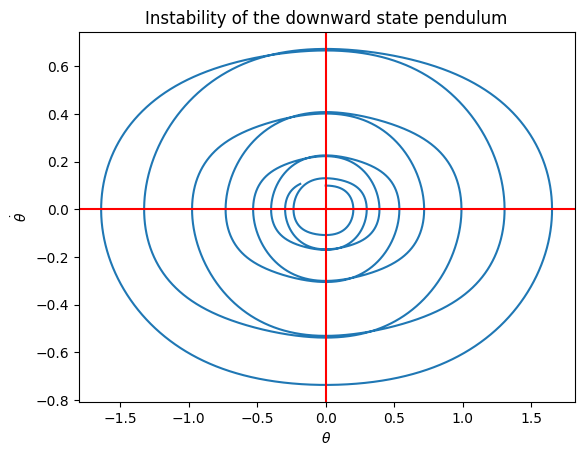

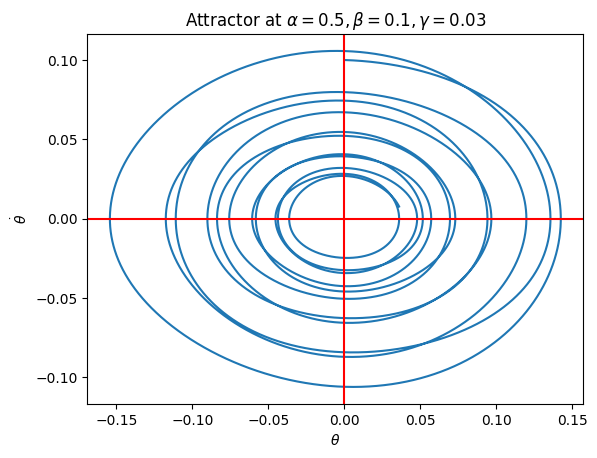

In [14]:
alpha = 0.5  #frequency                                  
beta = 0.1   #driving force                          
gamma = 0.0 #damping force                    

x_n4, t_n4 = Rk4(f3, [0,0.1],  0.0001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.axvline(x = 0, color = 'r', label = 't = $4x_{0}$') # x = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Stability of the downward state pendulum") #title
plt.show()

alpha = 0.25  #frequency                                  
beta = 0.1   #driving force                          
gamma = 0.0 #damping force                    

x_n4, t_n4 = Rk4(f3, [0,0.1],  0.0001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.axvline(x = 0, color = 'r', label = 't = $4x_{0}$') # x = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Instability of the downward state pendulum") #title
plt.show()

alpha = 0.5  #frequency                                  
beta = 0.1   #driving force                          
gamma = 0.03 #damping force                    

x_n4, t_n4 = Rk4(f3, [0,0.1],  0.0001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.axvline(x = 0, color = 'r', label = 't = $4x_{0}$') # x = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractor at $\\alpha =0.5, \\beta = 0.1, \\gamma = 0.03 $") #title
plt.show()

We first graph the phase map that shows stability. Since we have non dimensionalized our equation of motion, $\dot{\theta}$ is essentially our dimensionless momentum. Thereby we are essentially graphing momentum vs position. The uniform circle we see in graph one basically shows stability. I could graph more such concentric circles which would show multiple attractors. 

I have also shown an unstable version at slightly different parameters. 

The last graph shows the attractor. Here I have left out the transient in the graph and we also that since this is the downward equilibrium, th concentric circles at (0,0)

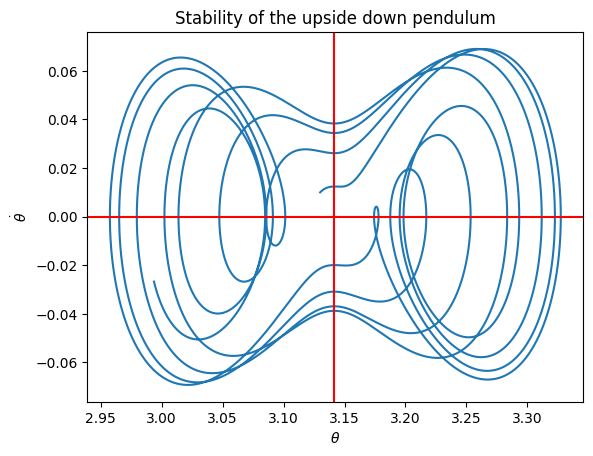

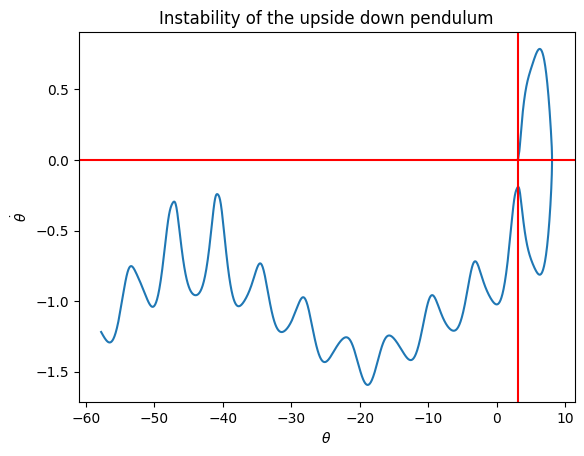

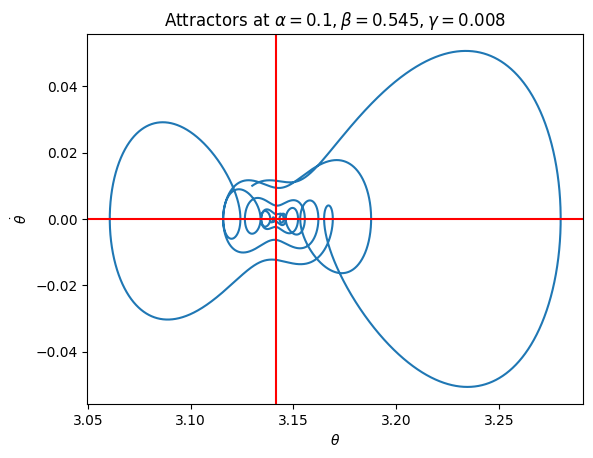

In [15]:
def f3(x_n,t): #mathematical function
    return np.array([x_n[1],-(alpha-(beta * np.cos(t))) * np.sin(x_n[0]) - gamma*x_n[1]])
alpha = 0.1  #frequency                             
beta = 0.545  #driving force                               
gamma = 0.0  #damping force                                  

x_n4, t_n4 = Rk4(f3, [3.13,0.01],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axvline(x = math.pi, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Stability of the upside down pendulum") #title
plt.show()

alpha = 0.2  #frequency                             
beta = 0.1  #driving force                               
gamma = 0.0  #damping force                                  

x_n4, t_n4 = Rk4(f3, [3.13,0.01],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axvline(x = math.pi, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Instability of the upside down pendulum") #title
plt.show()

alpha = 0.1  #frequency                             
beta = 0.545  #driving force                               
gamma = 0.08  #damping force                                  

x_n4, t_n4 = Rk4(f3, [3.13,0.01],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axvline(x = math.pi, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractors at $\\alpha = 0.1, \\beta = 0.545, \\gamma = 0.008$") #title
plt.show()

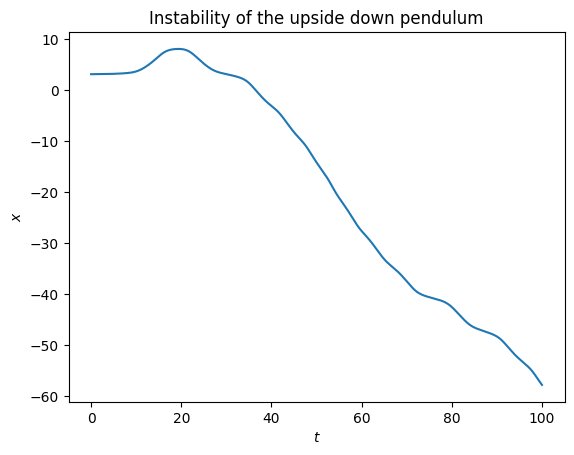

In [16]:
alpha = 0.2  #frequency                             
beta = 0.1  #driving force                               
gamma = 0.0  #damping force                                  

x_n4, t_n4 = Rk4(f3, [3.13,0.01],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
#t_vals4 = np.array([t_n4[i][0]for i in range (len (t_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
#plt.axvline(x = math.pi, color = 'r', label = 't = $4x_{0}$') # marking the time period
#plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.ylabel("$x$") #x axis
plt.xlabel("$t$") # yaxis
plt.title ("Instability of the upside down pendulum") #title
plt.show()